# Segmentación de Clientes para DesignReels

En el competitivo mundo del comercio electrónico, entender a fondo a nuestros clientes es fundamental para ofrecer experiencias personalizadas y maximizar la satisfacción y lealtad del cliente. Este análisis de segmentación de clientes tiene como objetivo explorar y comprender las distintas características y comportamientos de los clientes que interactúan con nuestra tienda en línea, especializada en productos creativos.

Utilizando técnicas avanzadas de análisis de datos, como clustering y segmentación, este estudio buscará identificar grupos homogéneos de clientes. Estos segmentos nos permitirán personalizar estrategias de marketing más efectivas, optimizar la selección de productos y mejorar la experiencia general de compra. Al comprender las necesidades y preferencias únicas de cada segmento, aspiramos a fortalecer la conexión emocional con la marca y aumentar la retención de clientes a largo plazo.

A lo largo de este análisis, exploraremos cómo diferentes segmentos de clientes interactúan con nuestros productos, qué atributos compartidos tienen y cómo podemos adaptar nuestras iniciativas de negocio para satisfacer mejor sus expectativas. Este enfoque estratégico no solo impulsará el crecimiento y la rentabilidad de DesignReels, sino que también nos permitirá destacar en un mercado saturado al ofrecer soluciones que verdaderamente resuenen con nuestros clientes.

Juntos, avanzaremos hacia una comprensión más profunda de nuestros clientes y hacia la creación de experiencias de compra personalizadas y significativas que fortalezcan la posición de DesignReels como líder en su categoría de productos creativos.


# Diccionario de datos 

El conjunto de datos contiene información detallada sobre las transacciones de ventas de la tienda 

Descripción de las Columnas

- invoice_no: Número de factura generado para cada transacción.
- stock_code: Código único que identifica cada producto vendido.
- description: Descripción del producto vendido.
- quantity: Cantidad de unidades vendidas de cada producto en la factura.
- invoice_date: Fecha y hora en que se emitió la factura.
- unit_price: Precio unitario del producto en la factura.
- customer_id: Identificación única del cliente que realizó la compra.
- region: Región o ubicación del cliente.
- total: Total de la venta, calculado como la cantidad vendida multiplicada por el precio unitario.

In [958]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [959]:
df = pd.read_csv(r'datasets\Online_Retail.csv', encoding='iso-8859-1')

In [960]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
66750,541816,22151,PLACE SETTING WHITE HEART,17,21/01/2020 15:56,0.42,17799.0,United Kingdom
126287,547070,21155,RED RETROSPOT PEG BAG,1,20/03/2020 13:58,2.55,16115.0,United Kingdom
247600,558774,21658,GLASS BEURRE DISH,1,04/07/2020 10:17,8.29,NaN,United Kingdom
322930,565234,21936,RED RETROSPOT PICNIC BAG,1,02/09/2020 09:38,5.79,NaN,United Kingdom
409657,572066,21204,DAISIES HONEYCOMB GARLAND,12,20/10/2020 13:07,1.65,15159.0,United Kingdom
387830,570388,22028,PENNY FARTHING BIRTHDAY CARD,12,10/10/2020 12:37,0.42,14911.0,EIRE
461615,575947,21786,POLKADOT RAIN HAT,1,13/11/2020 11:50,0.79,NaN,United Kingdom
158054,550272,23232,WRAP VINTAGE PETALS DESIGN,200,15/04/2020 12:14,0.34,18079.0,United Kingdom
268079,560385,48187,DOORMAT NEW ENGLAND,1,18/07/2020 12:53,7.95,14583.0,United Kingdom
414749,572483,22086,PAPER CHAIN KIT 50'S CHRISTMAS,8,24/10/2020 13:50,2.95,16444.0,United Kingdom


In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [962]:
#cambio del nombre de las columnas a minusculas
new_col_name = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    # Luego, pon todas las letras en minúsculas
    name_lowered = name_stripped.lower()
    # Por último, reemplaza los espacios entre palabras por guiones bajos
    name_no_spaces = name_lowered.replace(' ', '_')
    # Agrega el nuevo nombre a la lista de nuevos nombres de columna
    new_col_name.append(name_no_spaces)

df.columns = new_col_name


In [963]:
#cambio de tipo de la columna invoce_date a datetime
df['invoice_date']=pd.to_datetime(df['invoice_date'], format="%d/%m/%Y %H:%M")

In [964]:
#se llenan los nan de la columna customer_id con 0
df['customer_id'] = df['customer_id'].fillna(0)

In [965]:
#cambio del tipo de la columna customer_id a entero
df['customer_id'] = df['customer_id'].astype(int)

In [966]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
119738,546569,22979,PANTRY WASHING UP BRUSH,24,2020-03-15 10:53:00,1.45,14016,EIRE
235870,557645,84910A,PINK PAISLEY CUSHION COVER,1,2020-06-21 17:08:00,8.29,0,United Kingdom
220567,556199,21221,SET/4 BADGES CUTE CREATURES,10,2020-06-09 12:40:00,1.25,16170,United Kingdom
283549,561773,46000S,POLYESTER FILLER PAD 40x40cm,4,2020-07-29 12:41:00,1.45,17841,United Kingdom
382271,569898,23299,FOOD COVER WITH BEADS SET 2,1,2020-10-06 16:08:00,7.46,0,United Kingdom
112101,545869,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2020-03-07 14:45:00,4.95,17162,United Kingdom
365154,568698,22594,CHRISTMAS GINGHAM TREE,12,2020-09-28 14:57:00,0.85,14911,EIRE
162558,550512,22523,CHILDS GARDEN FORK PINK,2,2020-04-18 16:31:00,0.85,18069,United Kingdom
461494,575943,23313,VINTAGE CHRISTMAS BUNTING,4,2020-11-13 11:44:00,4.95,17920,United Kingdom
143446,548702,85152,HAND OVER THE CHOCOLATE SIGN,3,2020-04-03 11:36:00,2.10,17085,United Kingdom


In [967]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [968]:
#se remplaza el nombre de los paises agregaqdos como EIRE y RSA para unificar todos los nombres en ingles y mayusculas y minusculas 
df['region']= df['region'].replace('EIRE', 'Ireland')

In [969]:
df['region']= df['region'].replace('RSA', 'Sudafrica')

In [970]:
df['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [971]:
#verificacion de los valores menores a cero en la columan quantity. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
141,C536379,D,Discount,-1,2019-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2019-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2019-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2019-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2020-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2020-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2020-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2020-12-09 11:58:00,1.25,17315,United Kingdom


In [972]:
#verificacion de los valores menores a cero en la columan unit_price. Aun falta determinar que tratamiento se le daran a estos datos 
df[df['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
299983,A563186,B,Adjust bad debt,1,2020-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2020-08-12 14:52:00,-11062.06,0,United Kingdom


In [973]:
#creacion de una nueva columana que calcula el total vendido por factura 
df['total'] = df['quantity'] * df['unit_price']

In [974]:
#se convierten las descripciones a minuscula para unificar el formato 
df['description'] = df['description'].str.lower()

In [975]:
df.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
286211,562024,22980,pantry scrubbing brush,1,2020-08-01 16:07:00,3.29,0,United Kingdom,3.29
20081,538008,21843,red retrospot cake stand,2,2019-12-09 12:17:00,10.95,12683,France,21.90
245541,558614,22629,spaceboy lunch box,2,2020-06-30 15:56:00,1.95,0,United Kingdom,3.90
50178,540550,22629,spaceboy lunch box,12,2020-01-10 09:11:00,1.95,12539,Spain,23.40
468935,576560,23681,lunch bag red vintage doily,2,2020-11-15 13:21:00,1.65,12877,United Kingdom,3.30
198362,554034,23170,regency tea plate roses,48,2020-05-20 14:06:00,1.45,13324,United Kingdom,69.60
526601,580673,23380,pack of 12 vintage doily tissues,48,2020-12-05 14:30:00,0.39,13089,United Kingdom,18.72
150355,549428,21888,bingo set,30,2020-04-08 12:01:00,3.75,15815,United Kingdom,112.50
33223,539242,21192,white bell honeycomb paper,3,2019-12-16 13:16:00,1.65,0,United Kingdom,4.95
460594,575919,48111,doormat 3 smiley cats,10,2020-11-11 17:00:00,7.08,15311,United Kingdom,70.80


In [976]:
#verificar que no existe ningun valor 0 en la columna quantity; sin embargo tener en cuenta que si existen aun menores a 0 
df[df['quantity'] == 0]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [977]:
#se decide eliminar del dataframe los datos que en unit_price y en customer_id sean iguales a 0, dado que consideramos no aportan ningun informacion util para futuros analisis
ceros = df.query(('unit_price > 0 & customer_id >= 0'))
display(ceros)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
0,536365,85123A,white hanging heart t-light holder,6,2019-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2019-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2019-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2020-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,children's apron dolly girl,6,2020-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2020-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,2020-12-09 12:50:00,4.15,12680,France,16.60


In [978]:
#verificacion relacionado con los datos eliminados 
ceros['description'].unique()

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "u" bling key ring',
       'cream hanging heart t-light holder', 'paper craft  little birdie'],
      dtype=object)

In [979]:
#verificacion relacionado con los datos eliminados 
ceros['region'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'Sudafrica'], dtype=object)

In [980]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.year.unique()


array([2019, 2020])

In [981]:
#verificacion relacionado con los datos eliminados 
ceros['invoice_date'].dt.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [982]:
#se filta el data frame despues de las verificaciones anteriores para conservar unicamente los datos que sean diferentes a 0 

df = df.query('unit_price > 0.0')

df = df.query('customer_id > 0')

df = df.query('quantity > 0')

In [983]:
#Se observan los valores maximos de la columna unit price y nos damos cuenta que hay facturas que no son productos como tal, cuyos monton son muy altos dado que el valor por unidad es elevado tambien
#al parecer estas facturas corresponden a gastos de envio y/0 gastos varios que podrian afectar nuestra analisis de clientes, dado que nos interesa unicamente sus compras se eliminan del dataset
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
117054,546328,M,manual,1,2020-03-11 10:19:00,1687.17,14911,Ireland,1687.17
117055,546329,M,manual,1,2020-03-11 10:22:00,1687.17,14911,Ireland,1687.17
144826,548813,M,manual,1,2020-04-04 13:03:00,2382.92,12744,Singapore,2382.92
144828,548813,M,manual,1,2020-04-04 13:03:00,1252.95,12744,Singapore,1252.95
144829,548820,M,manual,1,2020-04-04 13:04:00,2053.07,12744,Singapore,2053.07
145831,548913,M,manual,1,2020-04-05 09:45:00,1136.30,12669,France,1136.30
150615,549468,M,manual,1,2020-04-08 14:27:00,1867.86,17940,United Kingdom,1867.86
173382,551697,POST,postage,1,2020-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75
187584,552980,POST,postage,1,2020-05-12 14:52:00,523.00,12590,Germany,523.00
188277,553018,M,manual,1,2020-05-12 19:02:00,557.72,12757,Portugal,557.72


In [984]:
df = df.query("stock_code != 'M'")
df = df.query("stock_code != 'DOT'")
df = df.query("stock_code != 'POST'")

In [985]:
df[df['unit_price']>= 450]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
222680,556444,22502,picnic basket wicker 60 pieces,60,2020-06-10 15:28:00,649.5,15098,United Kingdom,38970.0
222682,556446,22502,picnic basket wicker 60 pieces,1,2020-06-10 15:33:00,649.5,15098,United Kingdom,649.5


In [986]:
df[df['unit_price'] == 0.0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [987]:
df[df['quantity'] == 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total


In [988]:
df.sample(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,total
162752,550515,85145,jardin etched glass large bell jar,2,2020-04-18 17:29:00,3.95,14502,United Kingdom,7.90
353777,567823,22733,3d traditional christmas stickers,18,2020-09-22 12:55:00,1.25,12910,United Kingdom,22.50
329990,565863,22914,blue coat rack paris fashion,3,2020-09-07 15:00:00,4.95,17422,United Kingdom,14.85
237706,557878,22904,calendar paper cut design,8,2020-06-23 13:13:00,2.95,16940,United Kingdom,23.60
320834,565115,21745,gaolers keys decorative garden,1,2020-09-01 11:22:00,3.75,16880,United Kingdom,3.75
184834,552710,22706,wrap cowboys,25,2020-05-11 07:35:00,0.42,13098,United Kingdom,10.50
42517,540002,21790,vintage snap cards,144,2020-01-04 10:23:00,0.72,16656,United Kingdom,103.68
126459,547079,22478,birdhouse garden marker,2,2020-03-20 15:02:00,1.25,15408,United Kingdom,2.50
202660,554491,22227,hanging heart mirror decoration,10,2020-05-24 13:50:00,0.65,14606,United Kingdom,6.50
306011,563730,84406B,cream cupid hearts coat hanger,4,2020-08-18 17:43:00,4.15,14221,United Kingdom,16.60


In [989]:
#se verificaron los posibles datos duplicados en todas las columanas posibles y concluimos que los duplicados existentes son coherentes. No se elimina ninguno
df['stock_code'].duplicated().sum()

392823

In [990]:
df.describe()

,quantity,invoice_date,unit_price,customer_id,total
count,396485.000000,396485,396485.000000,396485.000000,396485.000000
mean,13.008066,2020-07-10 20:02:19.138226944,2.884385,15301.436912,22.114122
min,1.000000,2019-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2020-04-07 11:16:00,1.250000,13975.000000,4.680000
50%,6.000000,2020-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2020-10-20 14:40:00,3.750000,16801.000000,19.800000
max,80995.000000,2020-12-09 12:50:00,649.500000,18287.000000,168469.600000
std,179.607863,NaN,4.354867,1709.758505,308.841950


In [991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396485 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    396485 non-null  object        
 1   stock_code    396485 non-null  object        
 2   description   396485 non-null  object        
 3   quantity      396485 non-null  int64         
 4   invoice_date  396485 non-null  datetime64[ns]
 5   unit_price    396485 non-null  float64       
 6   customer_id   396485 non-null  int32         
 7   region        396485 non-null  object        
 8   total         396485 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.7+ MB


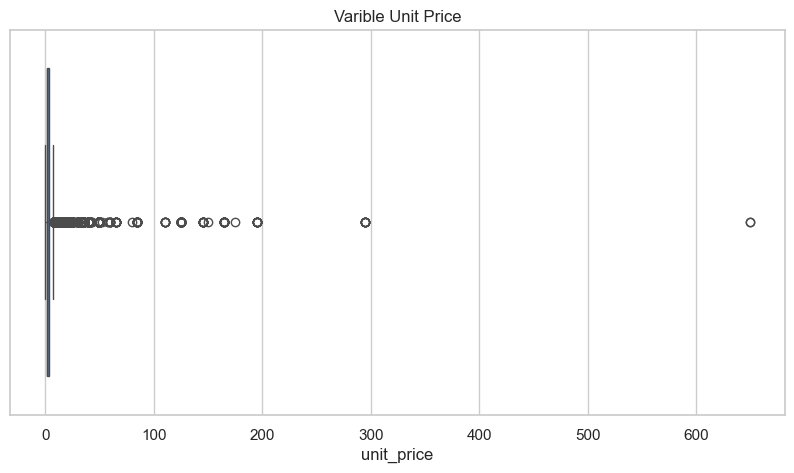

In [992]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['unit_price'])
plt.title('Varible Unit Price')
plt.show()

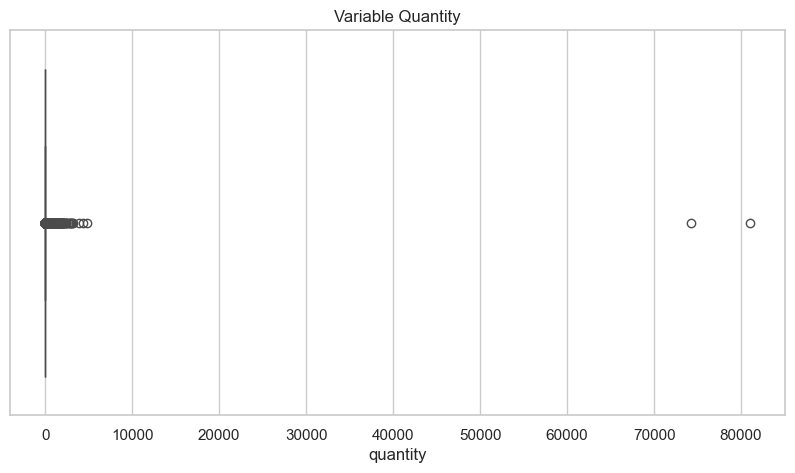

In [993]:
# Graficar un boxplot para identificar valores atípicos
plt.figure(figsize=(10,5))
sns.boxplot(x=df['quantity'])
plt.title('Variable Quantity')
plt.show()

In [994]:

# Persistiendo los cambios

df['invoice_date'] = pd.to_datetime(df['invoice_date'])
current_date = df['invoice_date'].max()

# Calcula Recencia, Frecuencia y Valor Monetario
rfm_df = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (current_date - x.max()).days,
    'total': ['sum', 'count']
})

rfm_df.columns = ['Recency', 'Monetary', 'Frequency']
rfm_df.reset_index(inplace=True)

# Asigna puntuaciones RFM
rfm_df['R_rank'] = pd.qcut(rfm_df['Recency'], 5, labels=False, duplicates='drop') + 1
rfm_df['F_rank'] = pd.qcut(rfm_df['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm_df['M_rank'] = pd.qcut(rfm_df['Monetary'], 5, labels=False, duplicates='drop') + 1

# Puedes combinar las puntuaciones en un código RFM para cada cliente
rfm_df['RFM_Score'] = rfm_df['R_rank'] + rfm_df['F_rank'] + rfm_df['M_rank']

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score
0,12346,326,77183.60,1,5,1,5,11
1,12347,1,4310.00,182,1,5,5,11
2,12348,74,1437.24,27,4,2,4,10
3,12349,18,1457.55,72,2,4,4,10
4,12350,310,294.40,16,5,2,2,9


In [995]:
rfm_df['RFM_Score'].value_counts()

RFM_Score
11    688
7     651
10    642
9     618
8     538
12    363
6     320
5     176
13    156
4      94
14     47
3      35
15      7
Name: count, dtype: int64

In [996]:
def segment_customer(row):
    if row['RFM_Score'] > 12:
        return 'Alto valor'
    elif row['RFM_Score'] > 9:
        return 'Leal'
    elif row['RFM_Score'] > 6:
        return 'Potencial'
    elif row['RFM_Score'] > 3:
        return 'Activo'
    else:
        return 'Cliente Perdido' 

# Aplica la función de segmentación a cada fila del DataFrame
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Muestra los resultados
display(rfm_df.head())

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment
0,12346,326,77183.60,1,5,1,5,11,Leal
1,12347,1,4310.00,182,1,5,5,11,Leal
2,12348,74,1437.24,27,4,2,4,10,Leal
3,12349,18,1457.55,72,2,4,4,10,Leal
4,12350,310,294.40,16,5,2,2,9,Potencial


In [997]:
# Conteo de clientes por segmento
print(rfm_df['Segment'].value_counts())

Segment
Potencial          1807
Leal               1693
Activo              590
Alto valor          210
Cliente Perdido      35
Name: count, dtype: int64


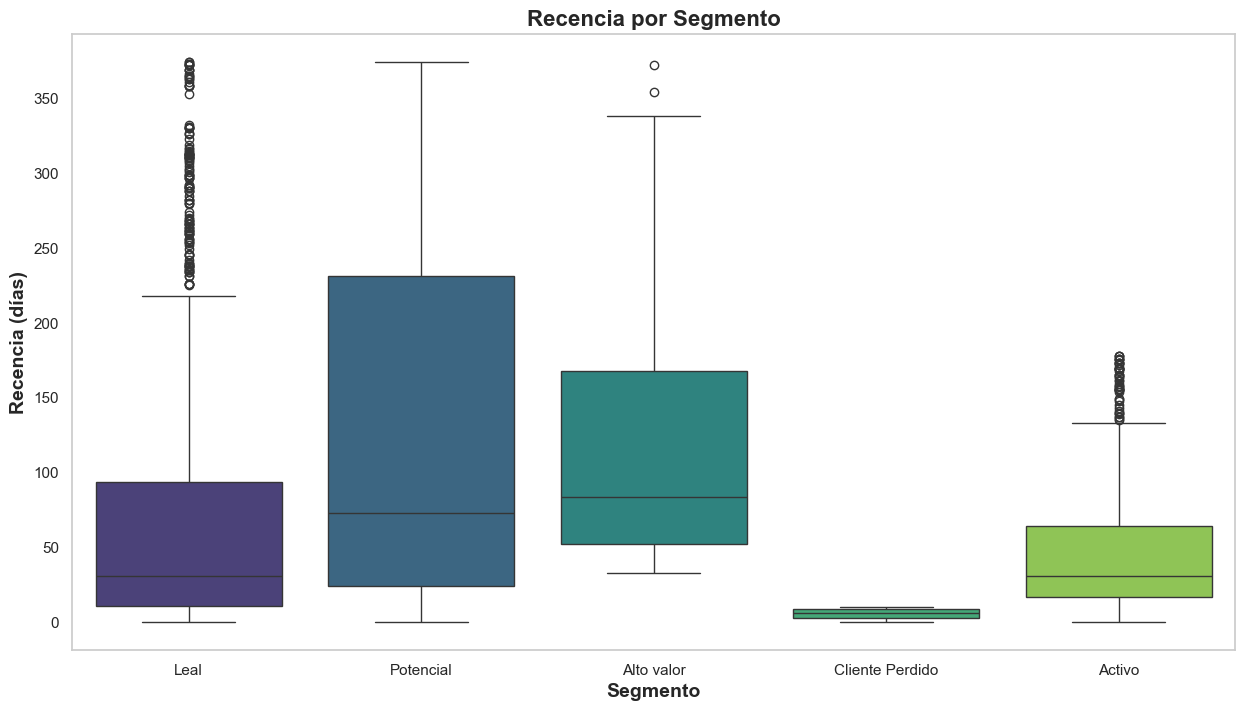

In [998]:
# Gráfico de Caja y Bigote para Recencia por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Recency', palette='viridis', hue='Segment')
plt.title('Recencia por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Recencia (días)', fontsize=14, fontweight='bold')
#plt.xticks(rotation=45)
plt.grid(False)
plt.show()

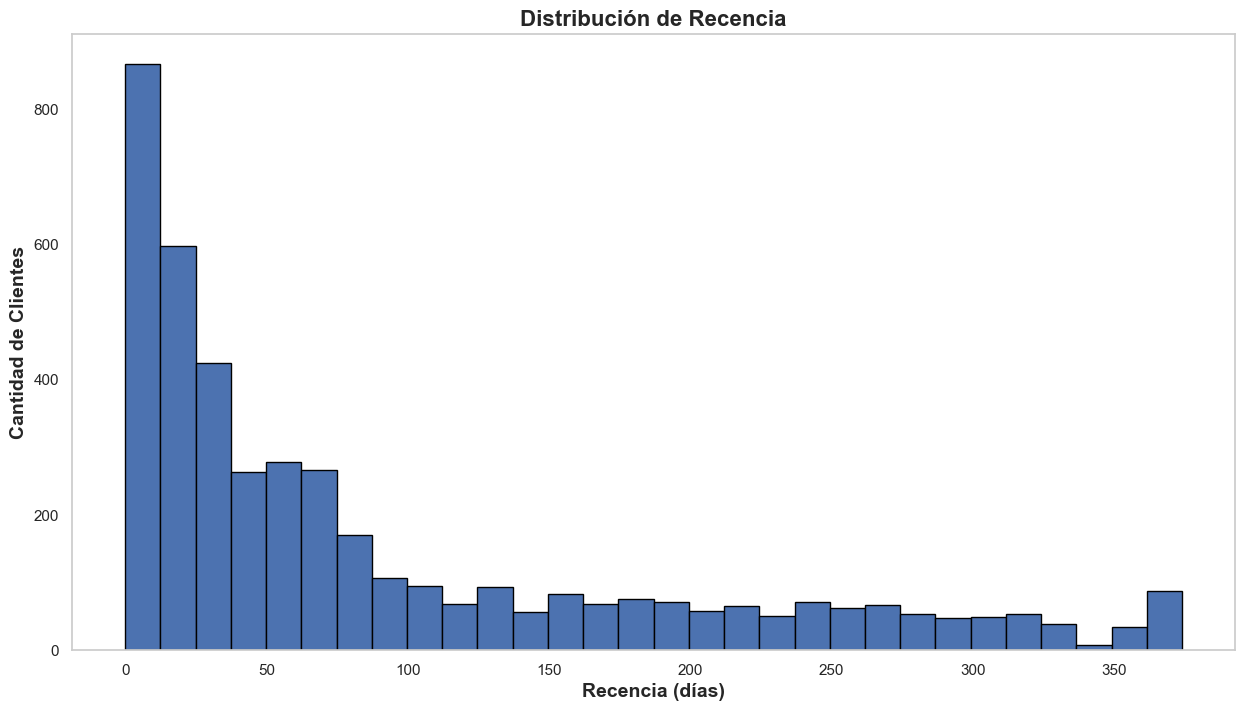

In [999]:
# Histogramas
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
rfm_df['Recency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Recencia', fontsize=16, fontweight='bold')
plt.xlabel('Recencia (días)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')
plt.show()

Podemos concluir que la mayoria de los clientes esperan entre 3 años 

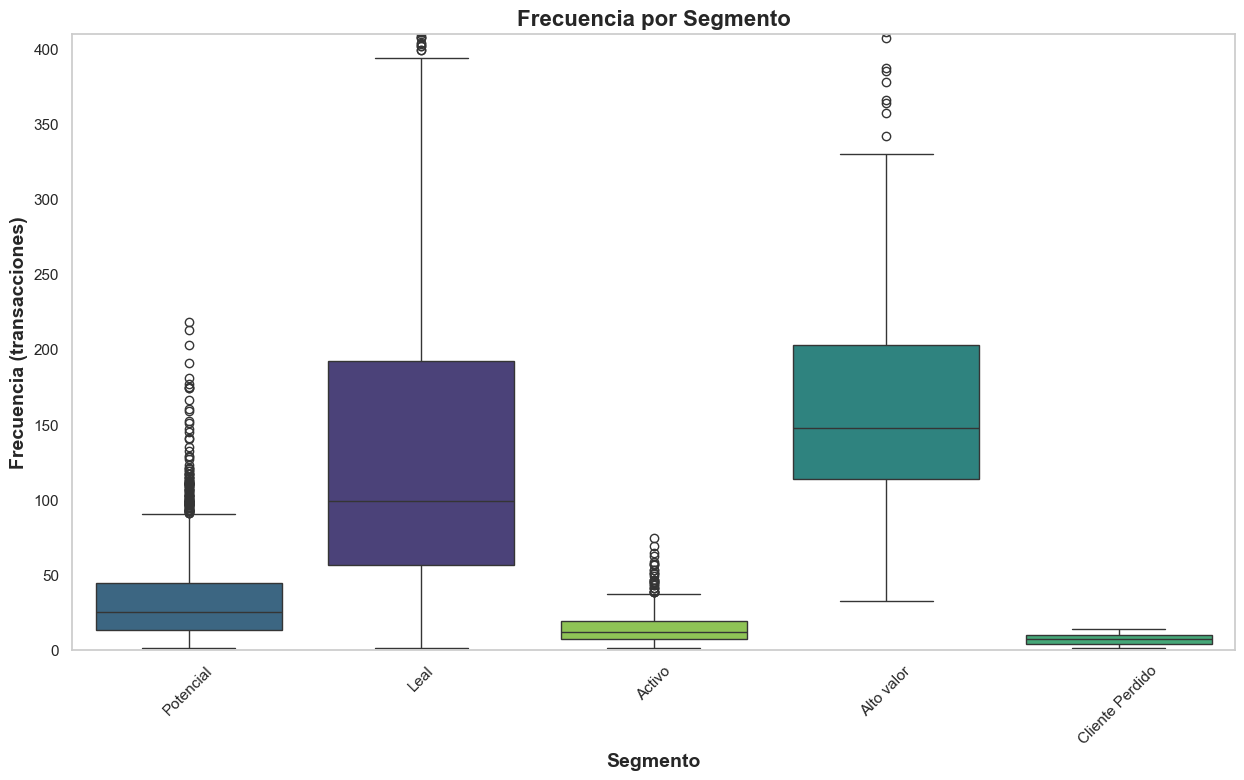

In [1000]:
# Gráfico de Caja y Bigote para Frecuencia por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Frequency', palette='viridis', order=rfm_df['Segment'].value_counts().index, hue='Segment' )#showfliers=False
plt.title('Frecuencia por Segmento',  fontsize=16, fontweight='bold')
plt.xlabel('Segmento',  fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia (transacciones)',  fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 410)
plt.grid(False)
plt.show()


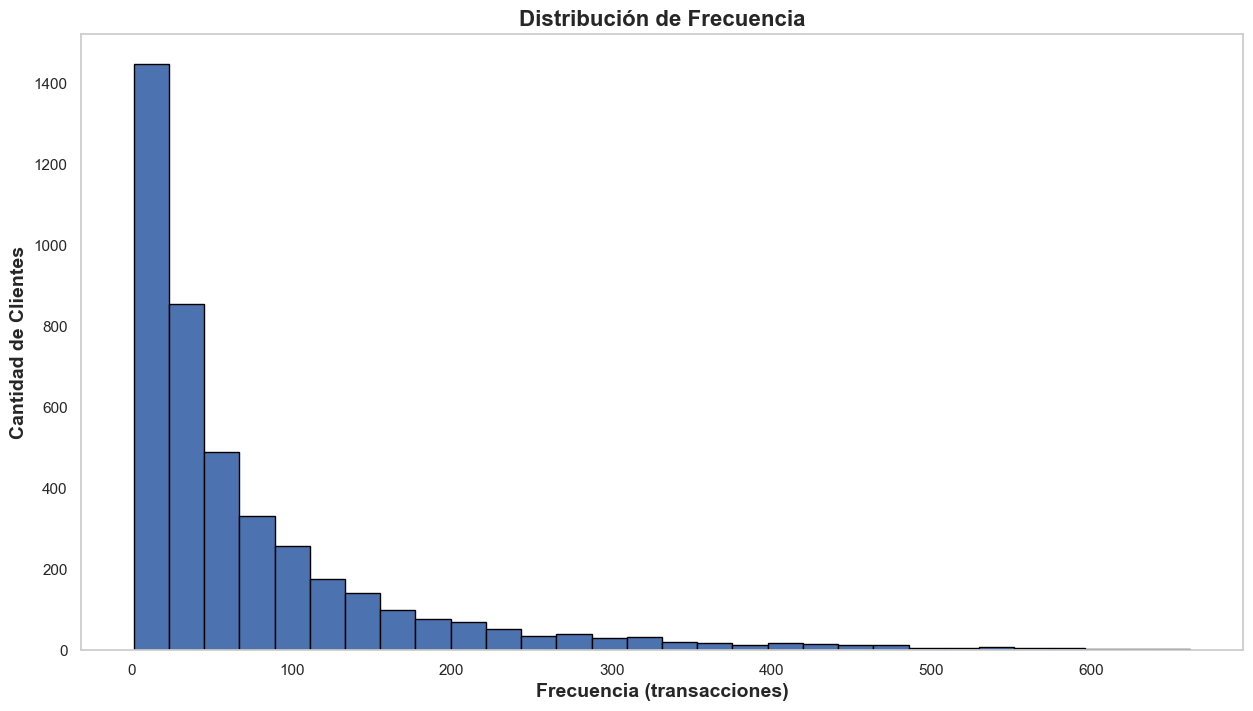

In [1001]:
sns.set(style="whitegrid")
filtered_data_f = rfm_df[rfm_df['Frequency'] < rfm_df['Frequency'].quantile(0.99)]
plt.figure(figsize=(15, 8))
filtered_data_f['Frequency'].hist(bins=30, edgecolor='black', grid=False)
plt.title('Distribución de Frecuencia', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia (transacciones)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')

plt.show()

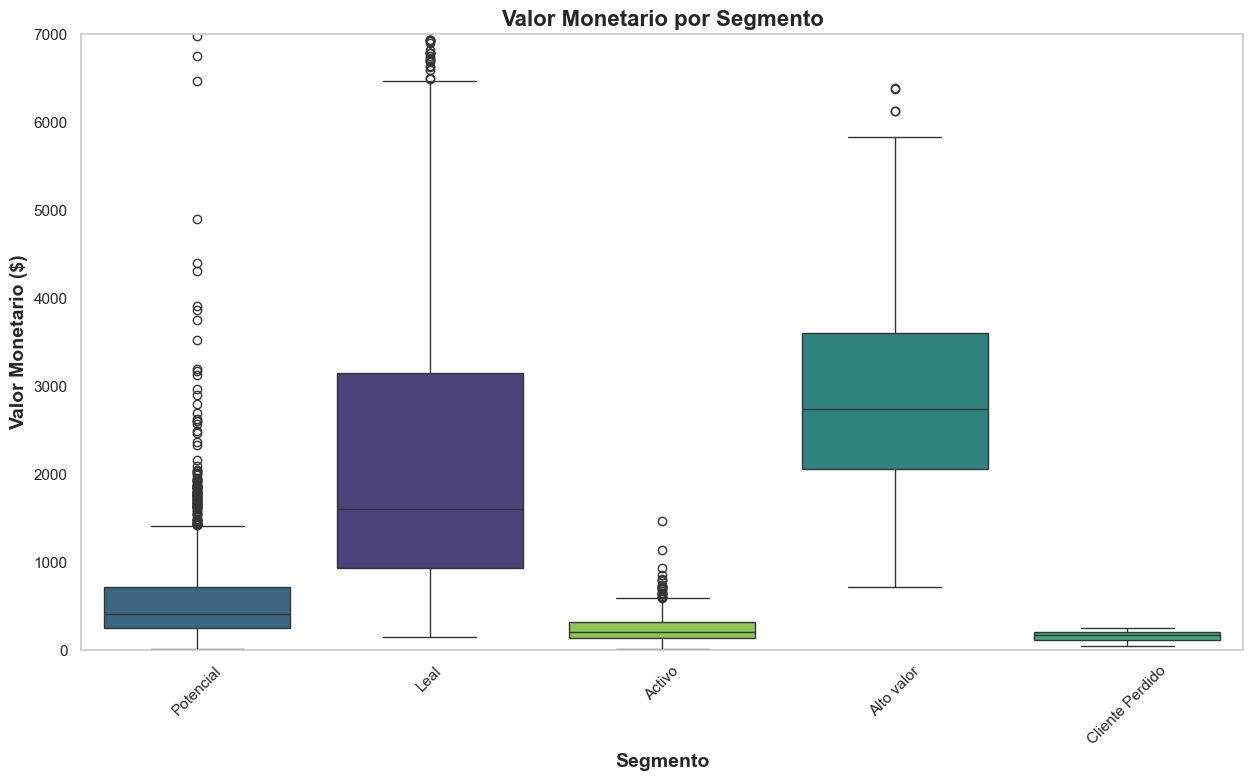

In [1002]:
# Gráfico de Caja y Bigote para Valor Monetario por Segmento
plt.figure(figsize=(15, 8))
sns.boxplot(data=rfm_df, x='Segment', y='Monetary', palette='viridis', order=rfm_df['Segment'].value_counts().index, hue='Segment')
plt.title('Valor Monetario por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 7000)

plt.grid(False)
plt.show()

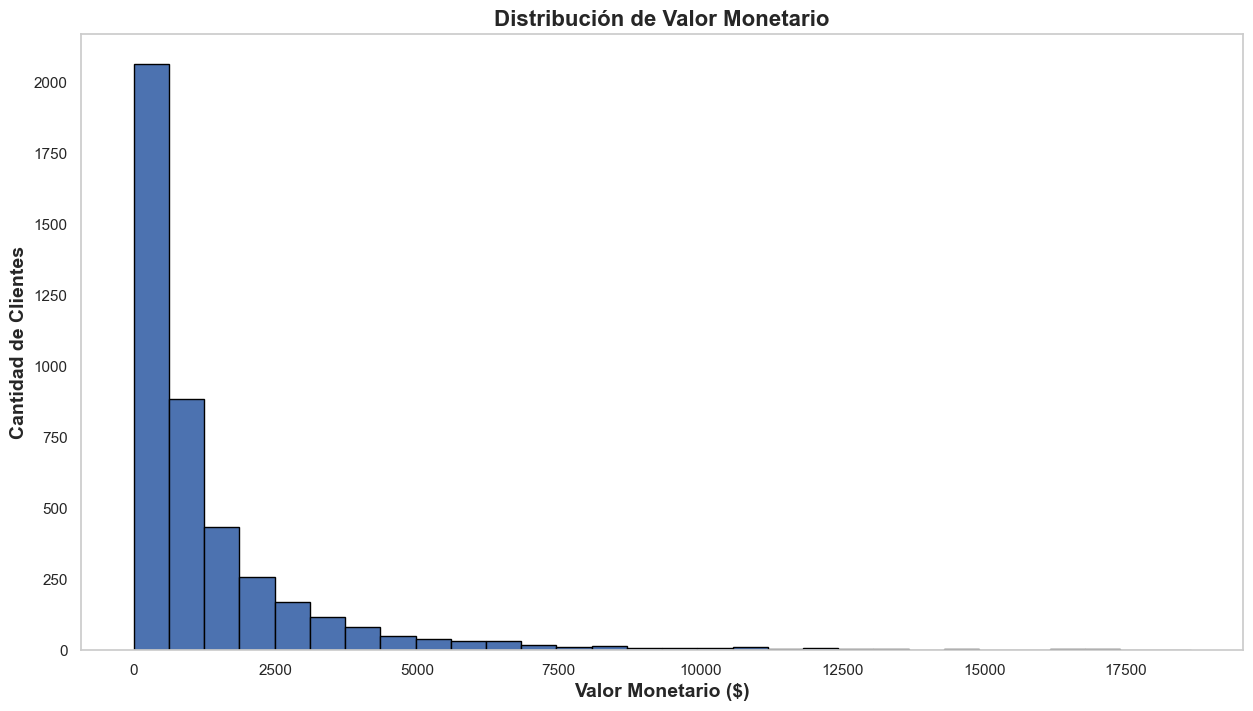

In [1003]:
sns.set(style="whitegrid")
filtered_data_m = rfm_df[rfm_df['Monetary'] < rfm_df['Monetary'].quantile(0.99)]
plt.figure(figsize=(15, 8))
filtered_data_m['Monetary'].hist(bins=30, edgecolor='black', grid= False)
plt.title('Distribución de Valor Monetario', fontsize=16, fontweight='bold')
plt.xlabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='x')

plt.show()


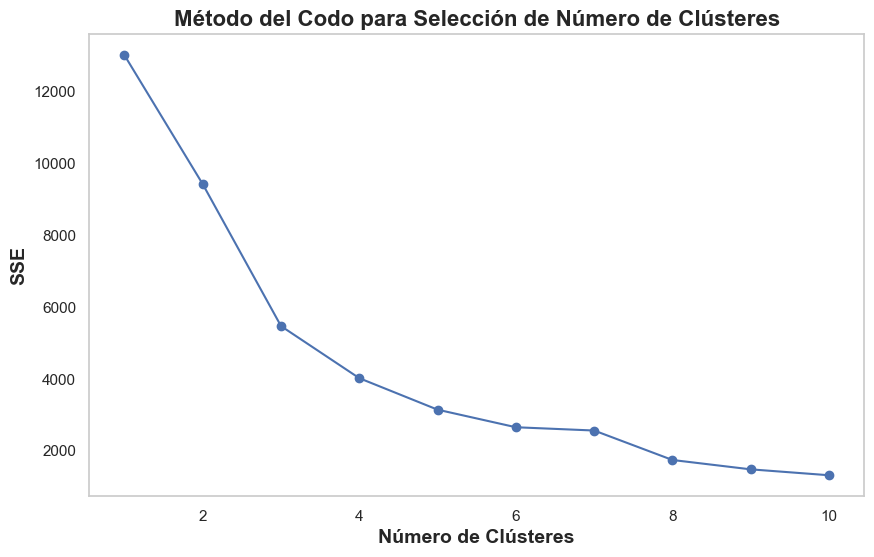

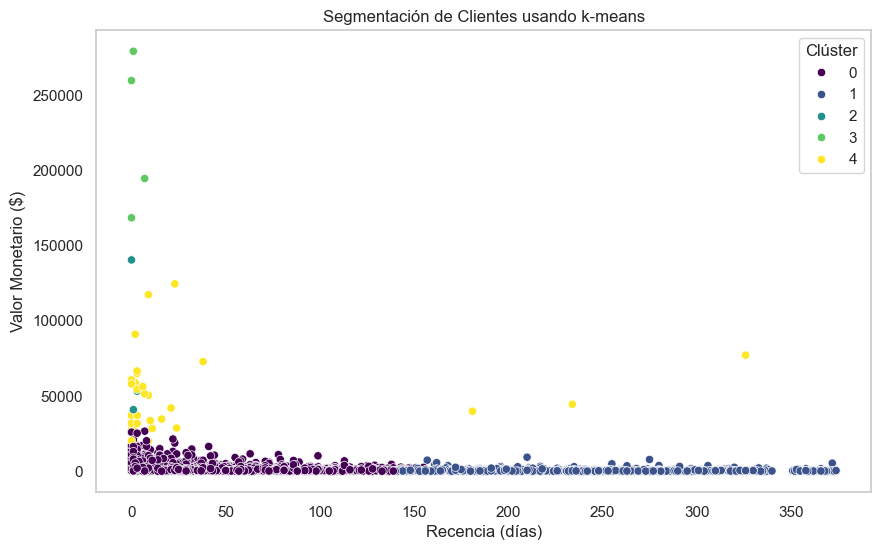

Cluster
0    3221
1    1075
4      31
2       4
3       4
Name: count, dtype: int64


Recency        Frequency          Monetary                
           mean median      mean  median      mean    median count
Cluster                                                           
0          40.7   29.0      99.0    55.0    1727.5     908.5  3221
1         247.2  242.0      27.9    18.0     486.4     308.6  1075
2           1.0    0.5    5796.5  5384.0   66748.5   47113.1     4
3           2.0    0.5     707.8   384.0  225454.7  227104.0     4
4          30.5    3.0     697.6   403.0   48766.9   42056.0    31

In [1004]:
# Normalizar los datos
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Método del codo para encontrar el número óptimo de clústeres
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo para Selección de Número de Clústeres', fontsize=16, fontweight='bold')
plt.xlabel('Número de Clústeres', fontsize=14, fontweight='bold')
plt.ylabel('SSE', fontsize=14, fontweight='bold')
plt.grid(False)
plt.show()

# Aplicar k-means con el número óptimo de clústeres (supongamos k=4)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Segmentación de Clientes usando k-means')
plt.xlabel('Recencia (días)')
plt.ylabel('Valor Monetario ($)')
plt.legend(title='Clúster')
plt.grid(False)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Distribución de clientes por clúster
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
display(cluster_summary)


Cluster Summary Sorted by Monetary Value:
          Recency  Frequency  Monetary
Cluster                              
1          247.2       27.9     486.4
0           40.7       99.0    1727.5
4           30.5      697.6   48766.9
2            1.0     5796.5   66748.5
3            2.0      707.8  225454.7


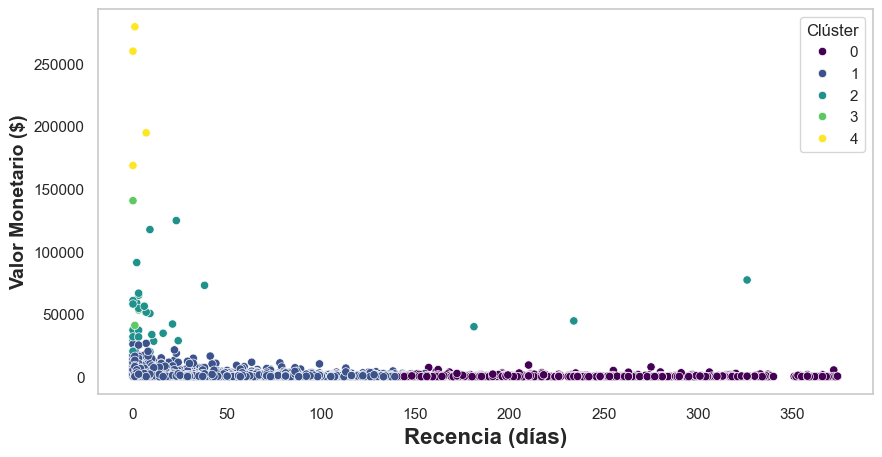

Cluster
1    3221
0    1075
2      31
3       4
4       4
Name: count, dtype: int64
Cluster Summary Ordered:
         Recency        Frequency          Monetary                
           mean median      mean  median      mean    median count
Cluster                                                           
0         247.2  242.0      27.9    18.0     486.4     308.6  1075
1          40.7   29.0      99.0    55.0    1727.5     908.5  3221
2          30.5    3.0     697.6   403.0   48766.9   42056.0    31
3           1.0    0.5    5796.5  5384.0   66748.5   47113.1     4
4           2.0    0.5     707.8   384.0  225454.7  227104.0     4


In [1005]:
# Aplicar k-means con el número óptimo de clústeres k=4
kmeans = KMeans(n_clusters=5, random_state=42)

rfm_df['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Calcular estadísticas descriptivas por clúster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

# Ordenar los clústeres por valor monetario promedio
cluster_summary = cluster_summary.sort_values(by='Monetary')
print("Cluster Summary Sorted by Monetary Value:\n", cluster_summary)

# Crear un diccionario para mapear los clústeres originales a los nuevos clústeres ordenados
cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(cluster_summary.index)}

# Reasignar los números de clústeres en el DataFrame original
rfm_df['Cluster'] = rfm_df['Cluster'].map(cluster_mapping)

# Visualizar los clústeres ordenados
plt.figure(figsize=(10,5))
sns.scatterplot(data=rfm_df, x='Recency', y='Monetary', hue='Cluster', palette='viridis')
plt.xlabel('Recencia (días)', fontsize=16, fontweight='bold')
plt.ylabel('Valor Monetario ($)', fontsize=14, fontweight='bold')
plt.legend(title='Clúster')
plt.grid(False)
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

# Distribución de clientes por clúster ordenado
print(rfm_df['Cluster'].value_counts())

# Estadísticas descriptivas por clúster ordenado
cluster_summary_ordered = rfm_df.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'count']
}).round(1)
print("Cluster Summary Ordered:\n", cluster_summary_ordered)

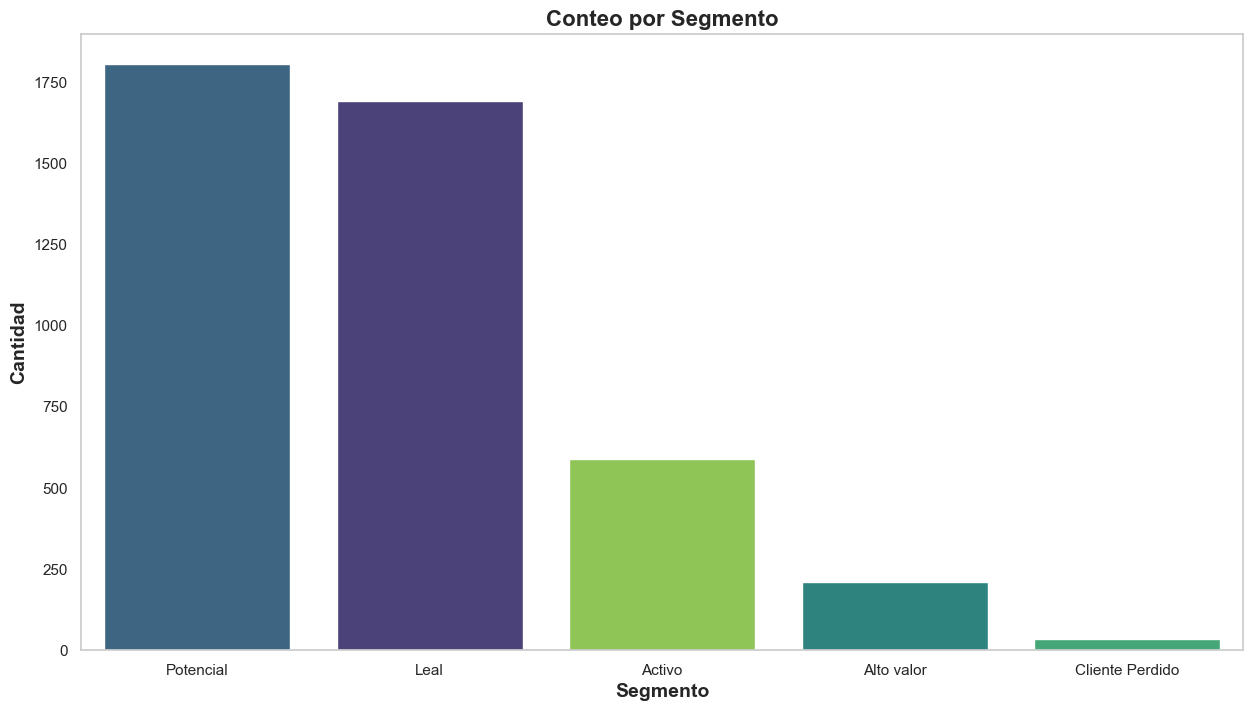

In [1006]:
# Gráfico de Barras de la Distribución de Segmentos

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, hue='Segment', palette='viridis', legend=False)


plt.title('Conteo por Segmento', fontsize=16, fontweight='bold')
plt.xlabel('Segmento', fontsize=14, fontweight='bold')
plt.ylabel('Cantidad', fontsize=14, fontweight='bold')

plt.grid(False)
plt.show()

Se realizo una segmentacion de cliente con base en la frecuencia con la que compran en la tienda, el monto que suelen gastar en sus compras y el tiempo transcurrido desde su ultima combra. Se obtuvieron 5 segmentos que dividen a los clientes en:
- *Potencial*: Son clientes con actividad superior a la media, en los cuales podemos enformar algun programa especifico para incentivarlos a convertirlos en clientes leales o de alto valor.
- *Leal*: En este grupo encontraremos a los clientes aliosos para la empresa, ya que son propensos a realizar compras repetidas y recomendar nuestros productos o servicios a otros.
- *Activo*: Clientes que utilizan compran nuestros productos de manera regular, sin llegar a superar el promedio de compras o visitas. Este segmento representa la mayor oportunidad de crecimiento para la empresa. Se deben implementar estrategias para aumentar la satisfacción y la lealtad de estos clientes.
- *Alto valor*: Estos clientes generan la mayor parte de los ingresos para la empresa. Es importante enfocarse en este segmento para mantener su satisfacción y lealtad.
- *Cliente Churn*: Estos clientes ya no compran nuestros productos. Es de vital importancia enfocarse en este segmento y analizar las razones por las que estos clientes se han perdido y tomar medidas para evitar que otros clientes se pierdan en el futuro.

In [1007]:
rfm_df.sample(10)

,customer_id,Recency,Monetary,Frequency,R_rank,F_rank,M_rank,RFM_Score,Segment,Cluster
2020,15108,141,1159.25,57,4,3,4,11,Leal,1
239,12641,114,145.90,9,4,1,1,6,Activo,1
2832,16205,30,754.78,97,2,4,3,9,Potencial,1
1736,14710,13,606.13,139,2,5,3,10,Leal,1
4023,17862,324,330.90,11,5,1,2,8,Potencial,0
1066,13790,3,348.80,45,1,3,2,6,Activo,1
668,13232,12,1357.00,206,1,5,4,10,Leal,1
361,12798,9,6977.04,8,1,1,5,7,Potencial,1
3860,17636,18,285.56,20,2,2,2,6,Activo,1
3753,17492,247,374.57,12,5,1,2,8,Potencial,0


In [1008]:
def churn(row):
    if row == 'Cliente Perdido':
        return 1 # cliente perdido o que probablemente abandone pronto
    else:
        return 0 #menos probabilidad de abandono 



rfm_df['Churn'] = rfm_df['Segment'].apply(churn)